### Submission Instructions

Just fill in the markdown and code cells below with your arguments and functions, and run the Python lines given. Make sure the notebook works fine by executing `Kernel/Restart & Run All`.
  
Once the notebook is ready,
1. Create a folder named `ftdl_last_name1_last_name2` with the team's last names.

2. Put in that folder:

* a file `mp_ftdl_last_name1_last_name2.ipynb` with the cells below completed. Make sure it works by executing Kernel/Restart & Run All.
* a file `mp_ftdl_last_name1_last_name2.html` with an html rendering of the previous .ipynb file (just apply File / Download as HTML after a correct run of Kernel/Restart & Run All).
* a file `mp_ftdl_last_name1_last_name2.pdf` with a pdf print of the html file **without any code**.

3. Compress the folder to a `ftdl_last_name1_last_name2.7z` 7z (or zip) file.

**Very important!!!**

Make sure you follow the file naming conventions above; the miniproject won't be graded until that is so.

## Recommendations in notebook writing

Notebooks are a great tool for data and model exploration. But in that process a lot of Python garbage can get into them as a consequence of the trial and error process.

But once these tasks are done and one arrives to final ideas and insights on the problem under study, the notebook should be **thoroughly cleaned** and the notebook should **concentrate on the insights and conclussions** without, of course, throwing away the good work done.

Below there are a few guidelines about this.

* Put the useful bits of your code as functions on a **Python module** (plus script, if needed) that is imported at the notebook's beginning. 
* Of course that module should be **properly documented** and **formatted** (try to learn about PEP 8 if you are going to write a lot of Python).
* Leave in the notebook **as little code as possible**, ideally one- or two-line cells calling a function, plotting results or so on.
* **Avoid boilerplate code**. If needed, put it in a module.
* Put on the notebook some way to **hide/display the code** (as shown below).
* The displayed information **should be just that, informative**. So forget about large tables, long output cells, dataframe or array displays and so on.
* Emphasize **insights and conclusions**, using as much markdown as needed to clarifiy and explain them.
* Make sure that **number cells consecutively starting at 1.**
* And, of course, make sure that **there are no errors left**. To avoid these last pitfalls, run `Kernel\Restart Kernel and Run All Cells`.

And notice that whoever reads your notebook is likely to toggle off your code and consider just the markdown cells. Because of this, once you feel that your notebook is finished,
* let it rest for one day, 
* then open it up, toggle off the code 
* and read it to check **whether it makes sense to you**.

If this is not the case, **the notebook is NOT finished!!!**

Following these rules you are much more likely to get good grades at school (and possibly also larger bonuses at work).

**IMPORTANT: before turning in your work, please REMOVE FROM IT THE PREVIOUS TWO CELLS**

In [ ]:
from IPython.display import HTML

HTML('''
<script>code_show=true; 

function code_toggle() {
    if (code_show){
    $('div.input').hide();
    } else {
    $('div.input').show();
    }
    code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to show or hide your raw code."></form>
''')

# The MNIST Problem

The MNIST database (Modified National Institute of Standards and Technology database[1]) is a large database of handwritten mnist that is commonly used for training and testing advanced machine learning algorithms. General references are:

**MNIST database**. Wikipedia. https://en.wikipedia.org/wiki/MNIST_database.

**THE MNIST DATABASE of handwritten mnist**. Yann LeCun, Courant Institute, NYU Corinna Cortes, Google Labs, New York Christopher J.C. Burges, Microsoft Research, Redmond. http://yann.lecun.com/exdb/mnist/

**Classification datasets results**. Rodrigo Benenson. https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

The MNIST database contains 60,000 training images and 10,000 testing images. In our dataset the images will be 32 x 32 greyscale digit rasters.
In order to manage our computations in reasonable time, we are going to work only with the test subset, which we will further randomly split in a 20% train and validation subset and an 80% test subset.

### Student contributions

* Student `Yu, Hyeon` has done all the hard report part ):
* Student `Shome, Subham` has done easy works ):

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

from sklearn.pipeline import Pipeline
import math
import requests


## Loading Data

Notice that the shape of each pattern is given by a $32 \times 32 \times 1$ tensor. Thus, you may have to reshape it to either a matrix or a vector depending on the task you want to perform.

In [ ]:
url = "https://raw.githubusercontent.com/subhamshome/deep-learning-datasets/main/mnist_32_32.bnch.joblib"
local_file_path = "mnist_32_32.bnch.joblib"

response = requests.get(url)
with open(local_file_path, 'wb') as f:
    f.write(response.content)

In [ ]:
mnist = joblib.load(local_file_path)

print(mnist.keys())

print("data_shape: {0}".format(mnist['data'].shape))
print("data_test_shape: {0}".format(mnist['data_test'].shape))

dict_keys(['DESCR', 'target', 'target_test', 'data', 'data_test'])
data_shape: (60000, 1024)
data_test_shape: (10000, 1024)


In [ ]:
X = mnist['data_test']
y = mnist['target_test']

print(y.tolist())

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
#Generating missing labels for the columns
labels = []
for i in range(1024):
    i_div = math.floor(i/32)
    i_mod = i % 32
    label = f'p_{i_div}_{i_mod}'
    labels.append(label)
print(labels)

['p_0_0', 'p_0_1', 'p_0_2', 'p_0_3', 'p_0_4', 'p_0_5', 'p_0_6', 'p_0_7', 'p_0_8', 'p_0_9', 'p_0_10', 'p_0_11', 'p_0_12', 'p_0_13', 'p_0_14', 'p_0_15', 'p_0_16', 'p_0_17', 'p_0_18', 'p_0_19', 'p_0_20', 'p_0_21', 'p_0_22', 'p_0_23', 'p_0_24', 'p_0_25', 'p_0_26', 'p_0_27', 'p_0_28', 'p_0_29', 'p_0_30', 'p_0_31', 'p_1_0', 'p_1_1', 'p_1_2', 'p_1_3', 'p_1_4', 'p_1_5', 'p_1_6', 'p_1_7', 'p_1_8', 'p_1_9', 'p_1_10', 'p_1_11', 'p_1_12', 'p_1_13', 'p_1_14', 'p_1_15', 'p_1_16', 'p_1_17', 'p_1_18', 'p_1_19', 'p_1_20', 'p_1_21', 'p_1_22', 'p_1_23', 'p_1_24', 'p_1_25', 'p_1_26', 'p_1_27', 'p_1_28', 'p_1_29', 'p_1_30', 'p_1_31', 'p_2_0', 'p_2_1', 'p_2_2', 'p_2_3', 'p_2_4', 'p_2_5', 'p_2_6', 'p_2_7', 'p_2_8', 'p_2_9', 'p_2_10', 'p_2_11', 'p_2_12', 'p_2_13', 'p_2_14', 'p_2_15', 'p_2_16', 'p_2_17', 'p_2_18', 'p_2_19', 'p_2_20', 'p_2_21', 'p_2_22', 'p_2_23', 'p_2_24', 'p_2_25', 'p_2_26', 'p_2_27', 'p_2_28', 'p_2_29', 'p_2_30', 'p_2_31', 'p_3_0', 'p_3_1', 'p_3_2', 'p_3_3', 'p_3_4', 'p_3_5', 'p_3_6', 'p_3_7

## Data Exploration, Visualization and Correlations

Descriptive statistics, boxplots and histograms.

### Some examples

Plot 10 randomly chosen digit images as 5 x 2 subplots.

In [ ]:
#define the DataFrame here
df = pd.DataFrame(data=X, columns=labels)
df['target'] = y

df.head()

,p_0_0,p_0_1,p_0_2,p_0_3,p_0_4,p_0_5,p_0_6,p_0_7,p_0_8,p_0_9,...,p_31_23,p_31_24,p_31_25,p_31_26,p_31_27,p_31_28,p_31_29,p_31_30,p_31_31,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


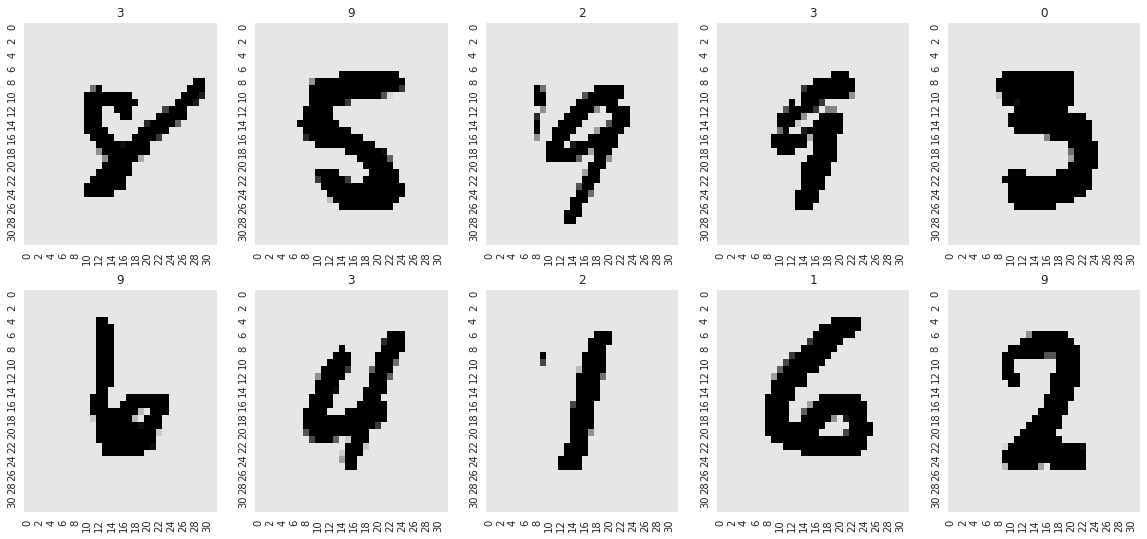

In [ ]:
#code the plotting here
cMap = sns.cubehelix_palette(n_colors=50, hue=0.05, rot=0, light=0.9, dark=0)

l_columns = labels
plt.figure(figsize=(20, 9))

for i in range(10):
    plt.subplot(2, 5, i+1)
    #select images randomly
    idx = np.random.randint(low=0, high=len(y))
    plt.title(int(mnist['target'][idx]))
    h_map = sns.heatmap(df[l_columns].iloc[idx].values.reshape(32, 32),
                    vmin=0., vmax=16., 
                    cmap=cMap, 
                    cbar=False,
                    # annot=True, 
                   )
plt.show()

### Descriptive analysis

Build a DataFrame to make easier the exploratory analysis.

In [ ]:
df.describe(include='all').round(decimals=2).T

,count,mean,std,min,25%,50%,75%,max
p_0_0,10000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
p_0_1,10000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
p_0_2,10000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
p_0_3,10000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
p_0_4,10000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
p_31_28,10000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
p_31_29,10000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
p_31_30,10000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
p_31_31,10000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


Describe the basic statistics of the pixels on the positions in the range `[494 : 502]` of the reshaped patterns.

In [ ]:
#perform the description here
df_custom = pd.DataFrame(data=X[:,494:502], columns=labels[494:502])
df_custom.describe(include='all').round(decimals=2).T

,count,mean,std,min,25%,50%,75%,max
p_15_14,10000.0,84.41,106.12,0.0,0.0,2.0,208.0,255.0
p_15_15,10000.0,96.37,109.08,0.0,0.0,25.0,233.0,255.0
p_15_16,10000.0,113.71,114.30,0.0,0.0,72.0,252.0,255.0
p_15_17,10000.0,127.31,112.31,0.0,0.0,132.0,253.0,255.0
p_15_18,10000.0,132.80,109.88,0.0,0.0,149.0,252.0,255.0
p_15_19,10000.0,128.99,112.47,0.0,0.0,140.0,252.0,255.0
p_15_20,10000.0,109.99,111.90,0.0,0.0,67.0,252.0,255.0
p_15_21,10000.0,80.92,104.67,0.0,0.0,0.0,193.0,255.0


### Boxplots

Compute and display the boxplots of pixels in the range `[494 : 502]`.

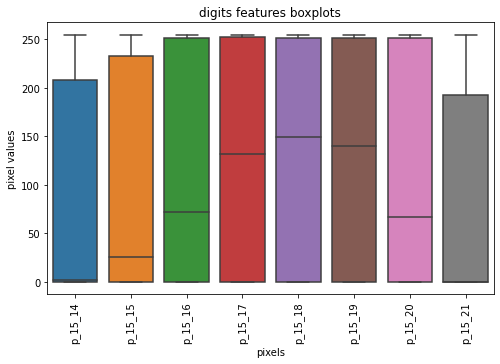

In [ ]:
#code the boxplots here
plt.figure( figsize=(8, 5))
plt.title("digits features boxplots")
sns.set_style("white")
bx_plot = sns.boxplot(data=df_custom)
plt.xticks(rotation=90)
plt.xlabel("pixels")
plt.ylabel("pixel values")
plt.show()

### Histograms and scatterplots

Plot pairplots and histograms over the previous pixel range using `sns.pairplot`.  
To do so select first two target mnist (e.g., 2 and 7) and apply `pairplot` only on patterns from those two targets.

In [ ]:
df_custom['target'] = y
df_custom_27 = df_custom[(df_custom['target']==2) | (df_custom['target']==7)]
df_custom_27.describe(include='all').round(decimals=2).T

,count,mean,std,min,25%,50%,75%,max
p_15_14,2060.0,20.64,59.57,0.0,0.00,0.0,0.00,255.0
p_15_15,2060.0,31.93,74.30,0.0,0.00,0.0,0.00,255.0
p_15_16,2060.0,55.53,92.84,0.0,0.00,0.0,84.25,255.0
p_15_17,2060.0,92.67,106.58,0.0,0.00,25.5,220.25,255.0
p_15_18,2060.0,140.71,107.15,0.0,6.75,168.5,252.00,255.0
p_15_19,2060.0,162.21,102.58,0.0,55.75,218.5,253.00,255.0
p_15_20,2060.0,143.30,110.03,0.0,0.00,185.5,253.00,255.0
p_15_21,2060.0,96.60,108.18,0.0,0.00,29.5,230.00,255.0
target,2060.0,4.50,2.50,2.0,2.00,2.0,7.00,7.0


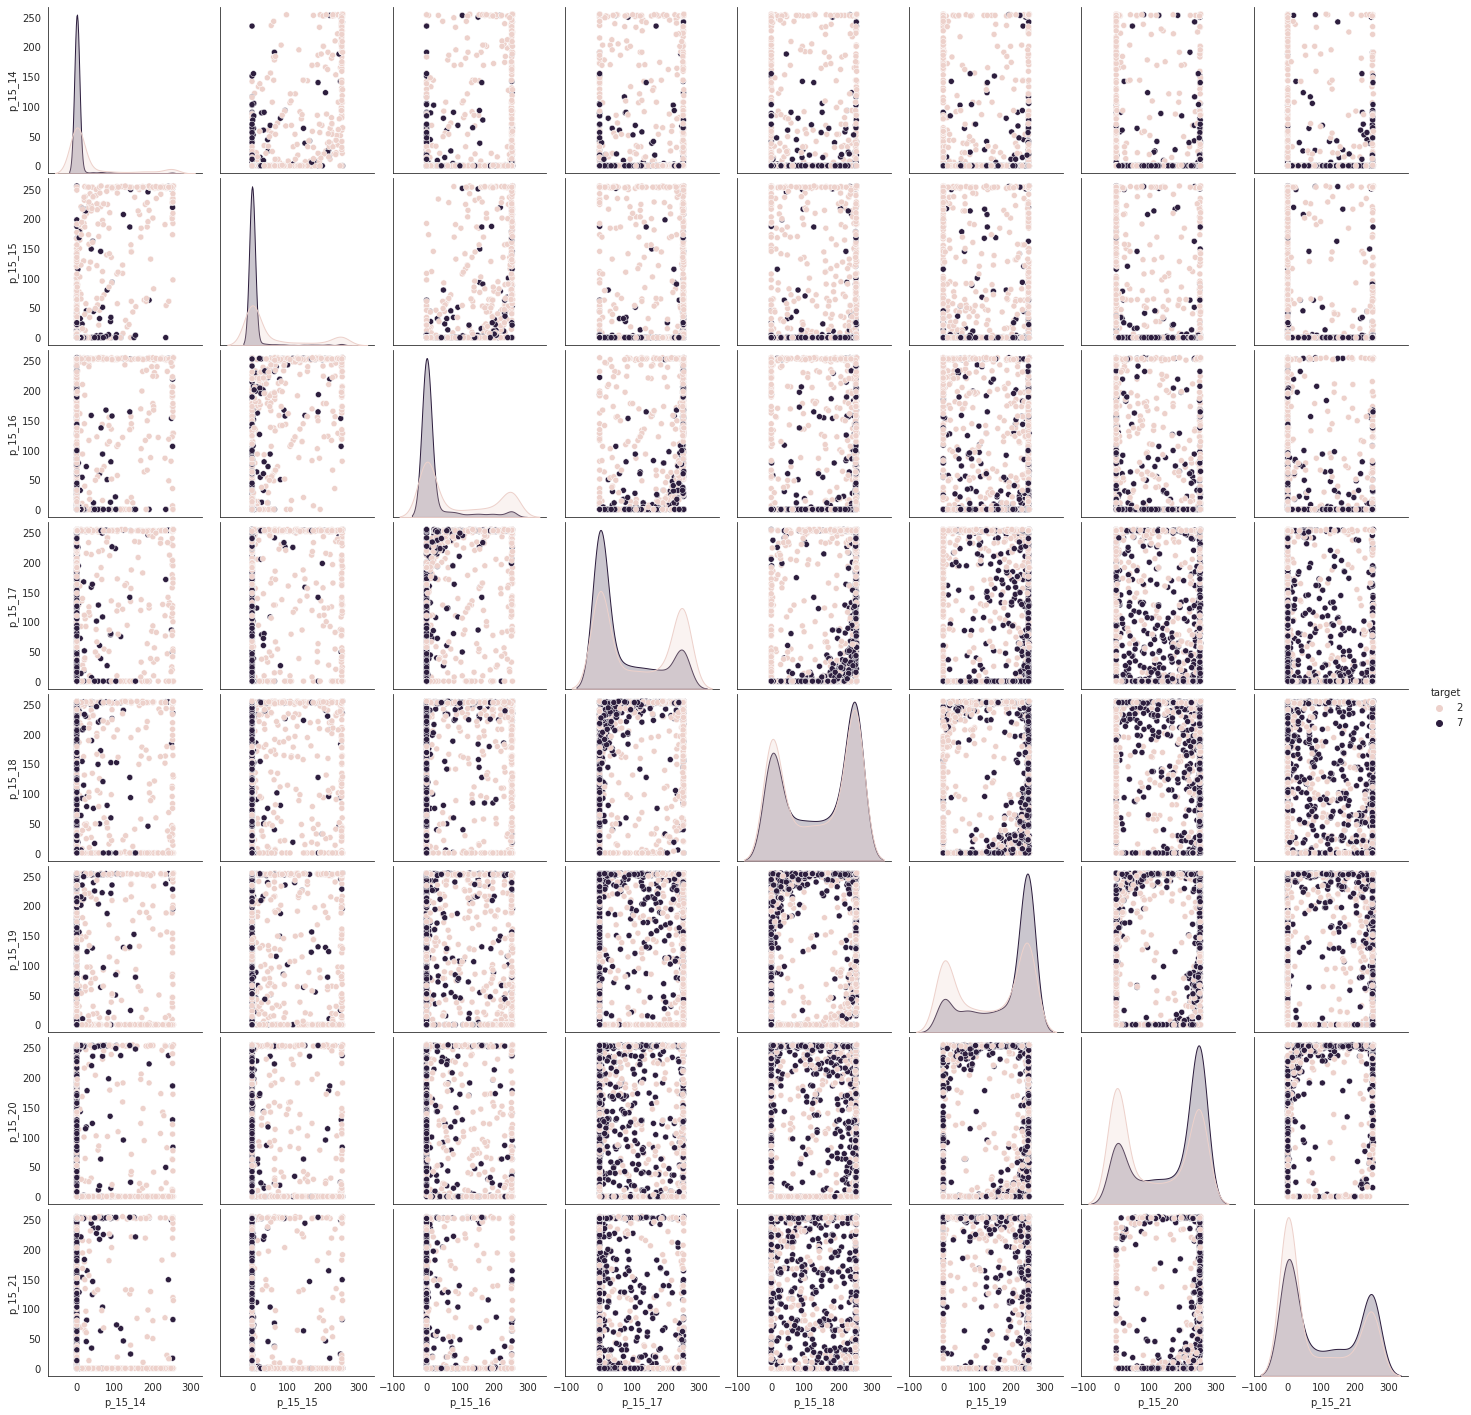

In [ ]:
#select two target mnist and apply sns.pairplot on the indicated pixel range
l_columns = labels[494 : 502]
pair_plot = sns.pairplot(df_custom_27[l_columns + ['target']], hue= 'target', diag_kind="kde", diag_kws=dict(fill=True))
plt.show()

### Correlations

Use the previous pixel range but drop the `target` column.

Use directly a heatmap to display the correlations.

In [ ]:
#display the correlations of the pixel range as a heatmap
df_data = df_custom_27.drop(columns=['target'], inplace=False)

df_data.corr()

,p_15_14,p_15_15,p_15_16,p_15_17,p_15_18,p_15_19,p_15_20,p_15_21
p_15_14,1.000000,0.795799,0.489212,0.188840,-0.047850,-0.179498,-0.167846,-0.084738
p_15_15,0.795799,1.000000,0.771431,0.381068,0.015674,-0.270579,-0.310107,-0.200518
p_15_16,0.489212,0.771431,1.000000,0.716272,0.212225,-0.305552,-0.469351,-0.355094
p_15_17,0.188840,0.381068,0.716272,1.000000,0.623150,-0.094440,-0.518909,-0.492345
p_15_18,-0.047850,0.015674,0.212225,0.623150,1.000000,0.475712,-0.230930,-0.505740
p_15_19,-0.179498,-0.270579,-0.305552,-0.094440,0.475712,1.000000,0.518198,-0.023333
p_15_20,-0.167846,-0.310107,-0.469351,-0.518909,-0.230930,0.518198,1.000000,0.649538
p_15_21,-0.084738,-0.200518,-0.355094,-0.492345,-0.505740,-0.023333,0.649538,1.000000


<ipython-input-17-587e67b3053e>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cMap = plt.cm.get_cmap("bwr",lut=n_colors )


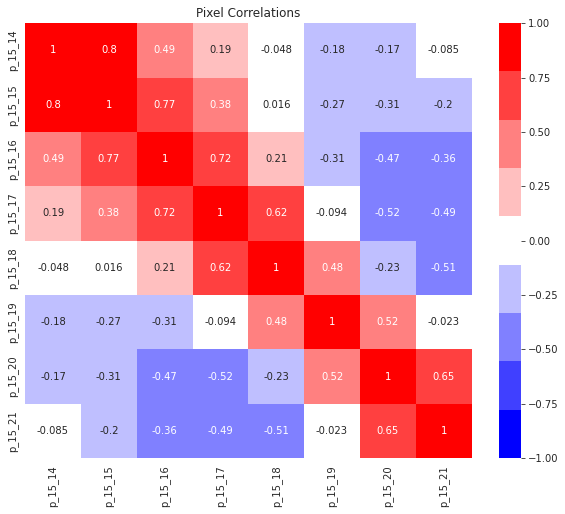

In [ ]:
# definir el color map
n_colors = 9
cMap = plt.cm.get_cmap("bwr",lut=n_colors ) 

# definir el heatmap
plt.figure( figsize=(10, 8))
plt.title('Pixel Correlations')
h_map = sns.heatmap(df_data[l_columns].corr().values,
                    vmin=-1., vmax=1., 
                    cmap=cMap, 
                    annot=True, 
                    xticklabels=list(df_data[l_columns]),
                    yticklabels=list(df_data[l_columns]))
plt.xticks(rotation=90) 

# generar el dibujo
plt.show()

### Data Analysis Conclusions

Write down here a summary of your conclusions after the basic data analysis

The dataset contains 10000 32X32 images of handwritten numbers between 0 to 9. First step of data exploration, visualization, and correlations was to plot 10 randomly chosen digit images as 5 X 2 subplots. This helped to visualize that the digits were written with different styles and some digits were not as clearly written as it is supposed to be.
Through the descriptive analysis, there were a lot of pixels that were 0s especially in the beginning and at the end. This shows that the digits were in the middle of the image in white with black background. Describing the basic statistics of the pixels between 493 (label p_15_14) to 501 (label p_15_21), it was evident that they were the area that needs to be focused. The box-plot further supported this. In addition, the box-plot demonstrated that the range of the pixel values increases as in the centre. 
The pair plot of digit 2 and 7 did not really provided a lot of information with a lot of overlap. This shows that if the classifying model is not good, there might be misclassification between the two digits.  However we believe that pair plot of 0 and 1 will provide more information since it will be more separable  with 0 not having a a lot of intensity in the middle region of the image. 
The heat map showed that the digits 2 and 7 pixels between 493 and 501 are highly correlated. There seems to be a lot of overlap between the intensity of the pixels in the middle. The correlation of 0 and 1 would be easier to see since the centroid pixels would very high negative correlation. However, the fact that the correlation does not necessarily imply causation and other factors, such as the style of handwriting of the digits can influence the correlations. 


# Classifiers

We are going to build a $k$-NN and an MLP classifier **over the test dataset**.  
But before working with any classifier, we split first the test dataset into a train-validation and a test subset.  
Use for this the class `StratifiedShuffleSplit` from scikit-learn. Set the `test_size` parameter to either `0.5` or `0.75`.

### Splitting the test dataset

In [ ]:
#split the test dataset here
split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
train, test = next(split.split(X, y))
X_train = X[train]
X_test = X[test]

y_train = y[train]
y_test = y[test]

print('Train samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])

Train samples: 5000
Test samples: 5000


## k-NN Classification

### Grid Search of Optimal Number of neighbors

In [ ]:
#define a knn classifier and use CV to estimate the best number of neighbors
knn_cf = Pipeline(steps=[('std_sc', StandardScaler()),
                                 ('knn', KNeighborsClassifier(weights='distance'))])

n_folds = 10
skf = StratifiedKFold(n_folds, 
                      shuffle=True)

l_k = [1] + [1 + 2**k for k in range(0, 6)]
param_grid = {'knn__n_neighbors': l_k}

knn_gscv = GridSearchCV(knn_cf, 
                        param_grid=param_grid, 
                        cv=skf, 
                        scoring='accuracy', 
                        return_train_score=True, 
                        n_jobs=-1, 
                        verbose=1)

print("GridSearch over a list of neighbors: {0}".format(l_k))
_ = knn_gscv.fit(X, y)

GridSearch over a list of neighbors: [1, 2, 3, 5, 9, 17, 33]
Fitting 10 folds for each of 7 candidates, totalling 70 fits


### Search Results 

We first examine the test scores of the 5 best hyperparameters.

In [ ]:
#transfor the CV results into a DataFrame and display the 5 best results
df_nn_k_search = pd.DataFrame.from_dict(knn_gscv.cv_results_)

display(df_nn_k_search[["param_knn__n_neighbors", "mean_test_score"]].sort_values(by="mean_test_score", ascending=False).head())

,param_knn__n_neighbors,mean_test_score
2,3,0.9203
3,5,0.9193
4,9,0.9168
0,1,0.9152
1,2,0.9152


We analyze the CV results to check whether the CV ranges used are correct.

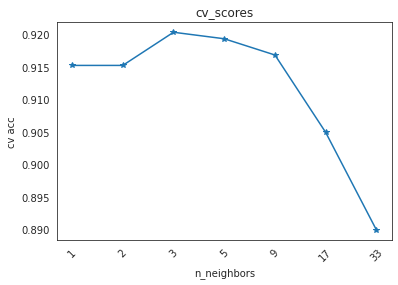

In [ ]:
#plot the test scores that correspond to each number of neighbors
plt.title("cv_scores")
plt.xlabel('n_neighbors')
plt.ylabel('cv acc')
plt.xticks(range(len(l_k)), l_k, rotation=45)
_ = plt.plot( df_nn_k_search['mean_test_score'], '*-')
plt.show()

### Fine tuning K

Performing fine tuned selection to get the optimized value of K for kNN classification

In [ ]:
highest_idx = np.argmax(df_nn_k_search['mean_test_score'])
first_idx = l_k[highest_idx - 1]
last_idx = l_k[highest_idx + 1]

knn_cf = Pipeline(steps=[('std_sc', StandardScaler()),
                                 ('knn', KNeighborsClassifier(weights='distance'))])

n_folds = 10
skf = StratifiedKFold(n_folds, 
                      shuffle=True)

new_l_k = range(first_idx + 1, last_idx)
param_grid = {'knn__n_neighbors': new_l_k}

knn_gscv = GridSearchCV(knn_cf, 
                        param_grid=param_grid, 
                        cv=skf, 
                        scoring='accuracy', 
                        return_train_score=True, 
                        n_jobs=-1, 
                        verbose=1)

print("GridSearch over a list of neighbors: {0}".format(new_l_k))
knn_gscv.fit(X_train, y_train)

GridSearch over a list of neighbors: range(3, 5)
Fitting 10 folds for each of 2 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('std_sc', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(weights='distance'))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(3, 5)},
             return_train_score=True, scoring='accuracy', verbose=1)

### Test Accuracy and Confusion Matrix

Precision and recall can also be defined for multiclass problems but we will skip them.

In [ ]:
#compute the test predictions, their accuracy and confusion matrix and discuss your results
best_k = knn_gscv.best_params_['knn__n_neighbors']

print("best_k: {0:d}".format(best_k))

knn_gscv.fit(X_train, y_train)
y_pred = knn_gscv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print("\nconfusion matrix:\n", confusion_matrix(y_test, y_pred))

best_k: 4
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Accuracy: 0.911

confusion matrix:
 [[476   0   1   0   0   5   7   0   1   0]
 [  0 565   2   0   0   0   1   0   0   0]
 [ 14   7 452  17   2   1   2   8  11   2]
 [  0   3   7 467   1   6   0  13   5   3]
 [  0  11   8   1 441   0   3   2   1  24]
 [  1   3   1  21   3 392   9   2   7   7]
 [  8   6   0   1   2   5 453   1   2   1]
 [  0  15   3   5   5   0   0 454   0  32]
 [  3   6   6  20   1  24   2   5 414   6]
 [  2   6   2   7  17   1   0  26   2 441]]


In [ ]:
for y in range(0,10):
  val = 0
  wrong = 0
  correct = 0
  for x in range(0,10):
    val += confusion_matrix(y_test, y_pred)[y][x]
    if(y==x):
      correct = confusion_matrix(y_test, y_pred)[y][x]
    else:
      wrong += confusion_matrix(y_test, y_pred)[y][x]
  print(f'{correct}/{val}={correct/val} wrong={wrong}')
    

476/490=0.9714285714285714 wrong=14
565/568=0.9947183098591549 wrong=3
452/516=0.875968992248062 wrong=64
467/505=0.9247524752475248 wrong=38
441/491=0.8981670061099797 wrong=50
392/446=0.8789237668161435 wrong=54
453/479=0.9457202505219207 wrong=26
454/514=0.8832684824902723 wrong=60
414/487=0.8501026694045175 wrong=73
441/504=0.875 wrong=63


<Axes: >

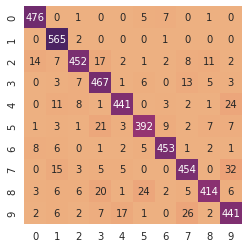

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            cmap='flare')

### Conclusions on the $k$-NN classifier

Discuss your results here

For the k-NN-classifier, the optimal number of neighbours were found using GridSearch cross-validation. GridSearchCV of [1, 2, 3, 5, 9, 17, 33], using accuracy as the scoring parameter resulted in the optimal number of neighbours being between 3 and 5 after fitting 10 folds for each of the 7 candidates (totalling 70 fits). The k-NN classifier with distance weight. to give more influence to closer neighbours of query point than the neighbours farther away, and default distance measure of Euclidean was used. Another GridSearchCV was used to find the best number of neighbours between 3 and 5 giving us the best k value of 4 with the test set accuracy of 0.911.

The classifier’s highest accuracy was for the digit 1 with the correct classification of 565/568 images.  Followed by digit 0 with the accuracy of 476/490. The lowest was for the digit  8 with 414/487, followed by 9 with 441/504.

## MLP Classifier

### CV Hyperparametrization

Define an appropriate `MLPClassifier` and perform CV to select proper `alpha` and `hidden_layer_sizes` hyperparameters.

In [ ]:
#define an appropriate MLP classifier and perform CV to select proper alpha and hidden_layer_sizes
n_folds = 10
skf = StratifiedKFold(n_folds, shuffle=True)

mlp_classifier = Pipeline(steps=[('std_sc', StandardScaler()),
                                 ('mlpc', MLPClassifier(solver='adam', 
                                              activation='relu',
                                              tol=1.e-4, 
                                              max_iter=1000,
                                              warm_start=False,
                                              shuffle=True))])

l_hidden_layer_sizes = [(128, 128), (128,64), (64, 32)]
l_alpha = [10.**k for k in range(-6, -2)]

param_grid = {'mlpc__alpha': l_alpha, 'mlpc__hidden_layer_sizes': l_hidden_layer_sizes}

mlpc_gscv = GridSearchCV(mlp_classifier, 
                         param_grid=param_grid, 
                         cv=skf, 
                         scoring='accuracy', 
                         return_train_score=True, 
                         n_jobs=-1, 
                         verbose=1)

t_0 = time.time() 
_ = mlpc_gscv.fit(X_train, y_train)
t_1 = time.time() 
print("\nmlp_grid_search_time: {0:.2}m".format((t_1 - t_0)/60.))


Fitting 10 folds for each of 12 candidates, totalling 120 fits

mlp_grid_search_time: 8.7m


### Search Results 

We first examine the test scores of the 5 best hyperparameters.

In [ ]:
#transfor the CV results into a DataFrame and display the 5 best results
df_cv_estimator = pd.DataFrame.from_dict(mlpc_gscv.cv_results_)

display(df_cv_estimator[["param_mlpc__alpha", "param_mlpc__hidden_layer_sizes", "mean_test_score"]].sort_values(by="mean_test_score", ascending=False).head())

,param_mlpc__alpha,param_mlpc__hidden_layer_sizes,mean_test_score
3,0.00001,"(128, 128)",0.9398
9,0.001,"(128, 128)",0.9396
0,0.000001,"(128, 128)",0.9386
4,0.00001,"(128, 64)",0.9382
6,0.0001,"(128, 128)",0.9378


We analyze the CV results to check whether the CV ranges used are correct.

best alpha: 0.000010	
alpha_min: 0.000001	alpha_max: 0.001000
best_hidden_layer_sizes (128, 128) 
acc: 0.940

 0    0.9386
3    0.9398
6    0.9378
9    0.9396
Name: mean_test_score, dtype: float64


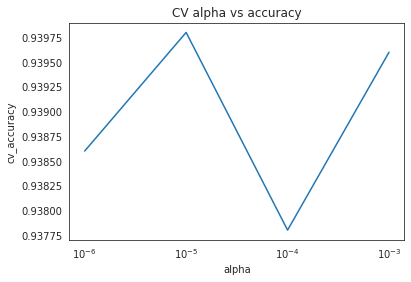

In [ ]:
#plot the test scores that correspond to each alpha; do this only for the best MLP architecture found
best_alpha = mlpc_gscv.best_params_['mlpc__alpha'] 
print("best alpha: %.6f\t" % best_alpha)
print("alpha_min: %f\talpha_max: %f" % (np.array(l_alpha).min(), np.array(l_alpha).max()))

best_hidden_layer_sizes = mlpc_gscv.best_params_['mlpc__hidden_layer_sizes'] 
print("best_hidden_layer_sizes", best_hidden_layer_sizes, "\nacc: %.3f" % mlpc_gscv.best_score_) 

idx_best_hidden_layer_sizes = [tup == best_hidden_layer_sizes for tup in df_cv_estimator['param_mlpc__hidden_layer_sizes'].values]
idx_best_hidden_layer_sizes = np.array(idx_best_hidden_layer_sizes)

print('\n', df_cv_estimator[idx_best_hidden_layer_sizes]['mean_test_score'])

plt.title("CV alpha vs accuracy")
plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel("cv_accuracy")
_ = plt.plot( df_cv_estimator[idx_best_hidden_layer_sizes]['param_mlpc__alpha'], 
              df_cv_estimator[idx_best_hidden_layer_sizes]['mean_test_score'])

### Test MLPC Performance

We check the test accuracy and confusion matrix.

In [ ]:
#compute the test predictions, their accuracy and confusion matrix and discuss your results
# y_pred = cross_val_predict(mlpc_gscv.best_estimator_, X_train, y_train, cv=skf, n_jobs=2)

y_pred = mlpc_gscv.predict(X_test)
acc    = accuracy_score(y_test, y_pred)

print("acc: %.3f\t" % acc)

print("\nconfusion matrix:\n", confusion_matrix(y_test, y_pred))

acc: 0.944	

confusion matrix:
 [[477   0   2   0   2   2   5   0   1   1]
 [  0 561   2   0   1   1   1   0   2   0]
 [  3   1 478   7   6   1   6   7   7   0]
 [  0   1   6 469   0  14   0   6   5   4]
 [  1   0   3   0 470   0   8   1   0   8]
 [  0   2   0   6   1 417   7   3   6   4]
 [  1   0   3   0   4   5 463   1   2   0]
 [  1   5   7   2   2   2   0 479   2  14]
 [  0   2  10   7   1   9   5   5 446   2]
 [  2   4   2   6  16   3   1  10   1 459]]


<Axes: >

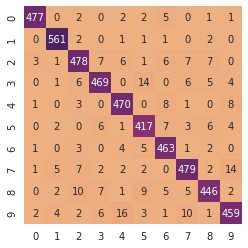

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            cmap='flare')

In [ ]:
for y in range(0,10):
  val = 0
  wrong = 0
  correct = 0
  for x in range(0,10):
    val += conf_mat[y][x]
    if(y==x):
      correct = conf_mat[y][x]
    else:
      wrong += conf_mat[y][x]
  print(f'{correct}/{val}={correct/val} wrong={wrong}')

477/490=0.9734693877551021 wrong=13
561/568=0.9876760563380281 wrong=7
478/516=0.9263565891472868 wrong=38
469/505=0.9287128712871288 wrong=36
470/491=0.9572301425661914 wrong=21
417/446=0.9349775784753364 wrong=29
463/479=0.9665970772442589 wrong=16
479/514=0.9319066147859922 wrong=35
446/487=0.9158110882956879 wrong=41
459/504=0.9107142857142857 wrong=45


### Conclusions on the MLP classifier

Discuss your results here

Using accuracy as the scoring method, GridSearchCV of 10 fold was used to find the best alpha between [1e-06, 1e-05, 0.0001, 0.001] and hidden layer size between [(128, 128), (128,64), (64, 32)].  With the best estimator of of 0.000010 and hidden layers of (128, 128), MLPC performed better than KNN with accuracy of 0.944.

The classifier’s highest accuracy was for the digit 1 with the correct classification of 561/568 images.  Followed by digit 0 with the accuracy of 477/490. The lowest was for the digit  8 with 446/487, followed by 9 with 459/504. The reasoning might be the same where the MNIST dataset has digits that look similar to each other.


### Predicting probabilities

We compute class probabilities over the test subset and pairplot them over the 10 classes.

In [ ]:
#compute the test prediction probabilities, and pairplot them here
y_pred_proba = mlpc_gscv.predict_proba(X_test)

df_proba = pd.DataFrame(data=y_test, columns=['target'])
df_proba['max_prob'] = np.amax(y_pred_proba,1)
df_proba['pred_target'] = np.argmax(y_pred_proba,1)
df_proba.describe(include='all').round(decimals=2).T

,count,mean,std,min,25%,50%,75%,max
target,5000.0,4.44,2.90,0.00,2.0,4.0,7.0,9.0
max_prob,5000.0,0.98,0.07,0.31,1.0,1.0,1.0,1.0
pred_target,5000.0,4.43,2.88,0.00,2.0,4.0,7.0,9.0


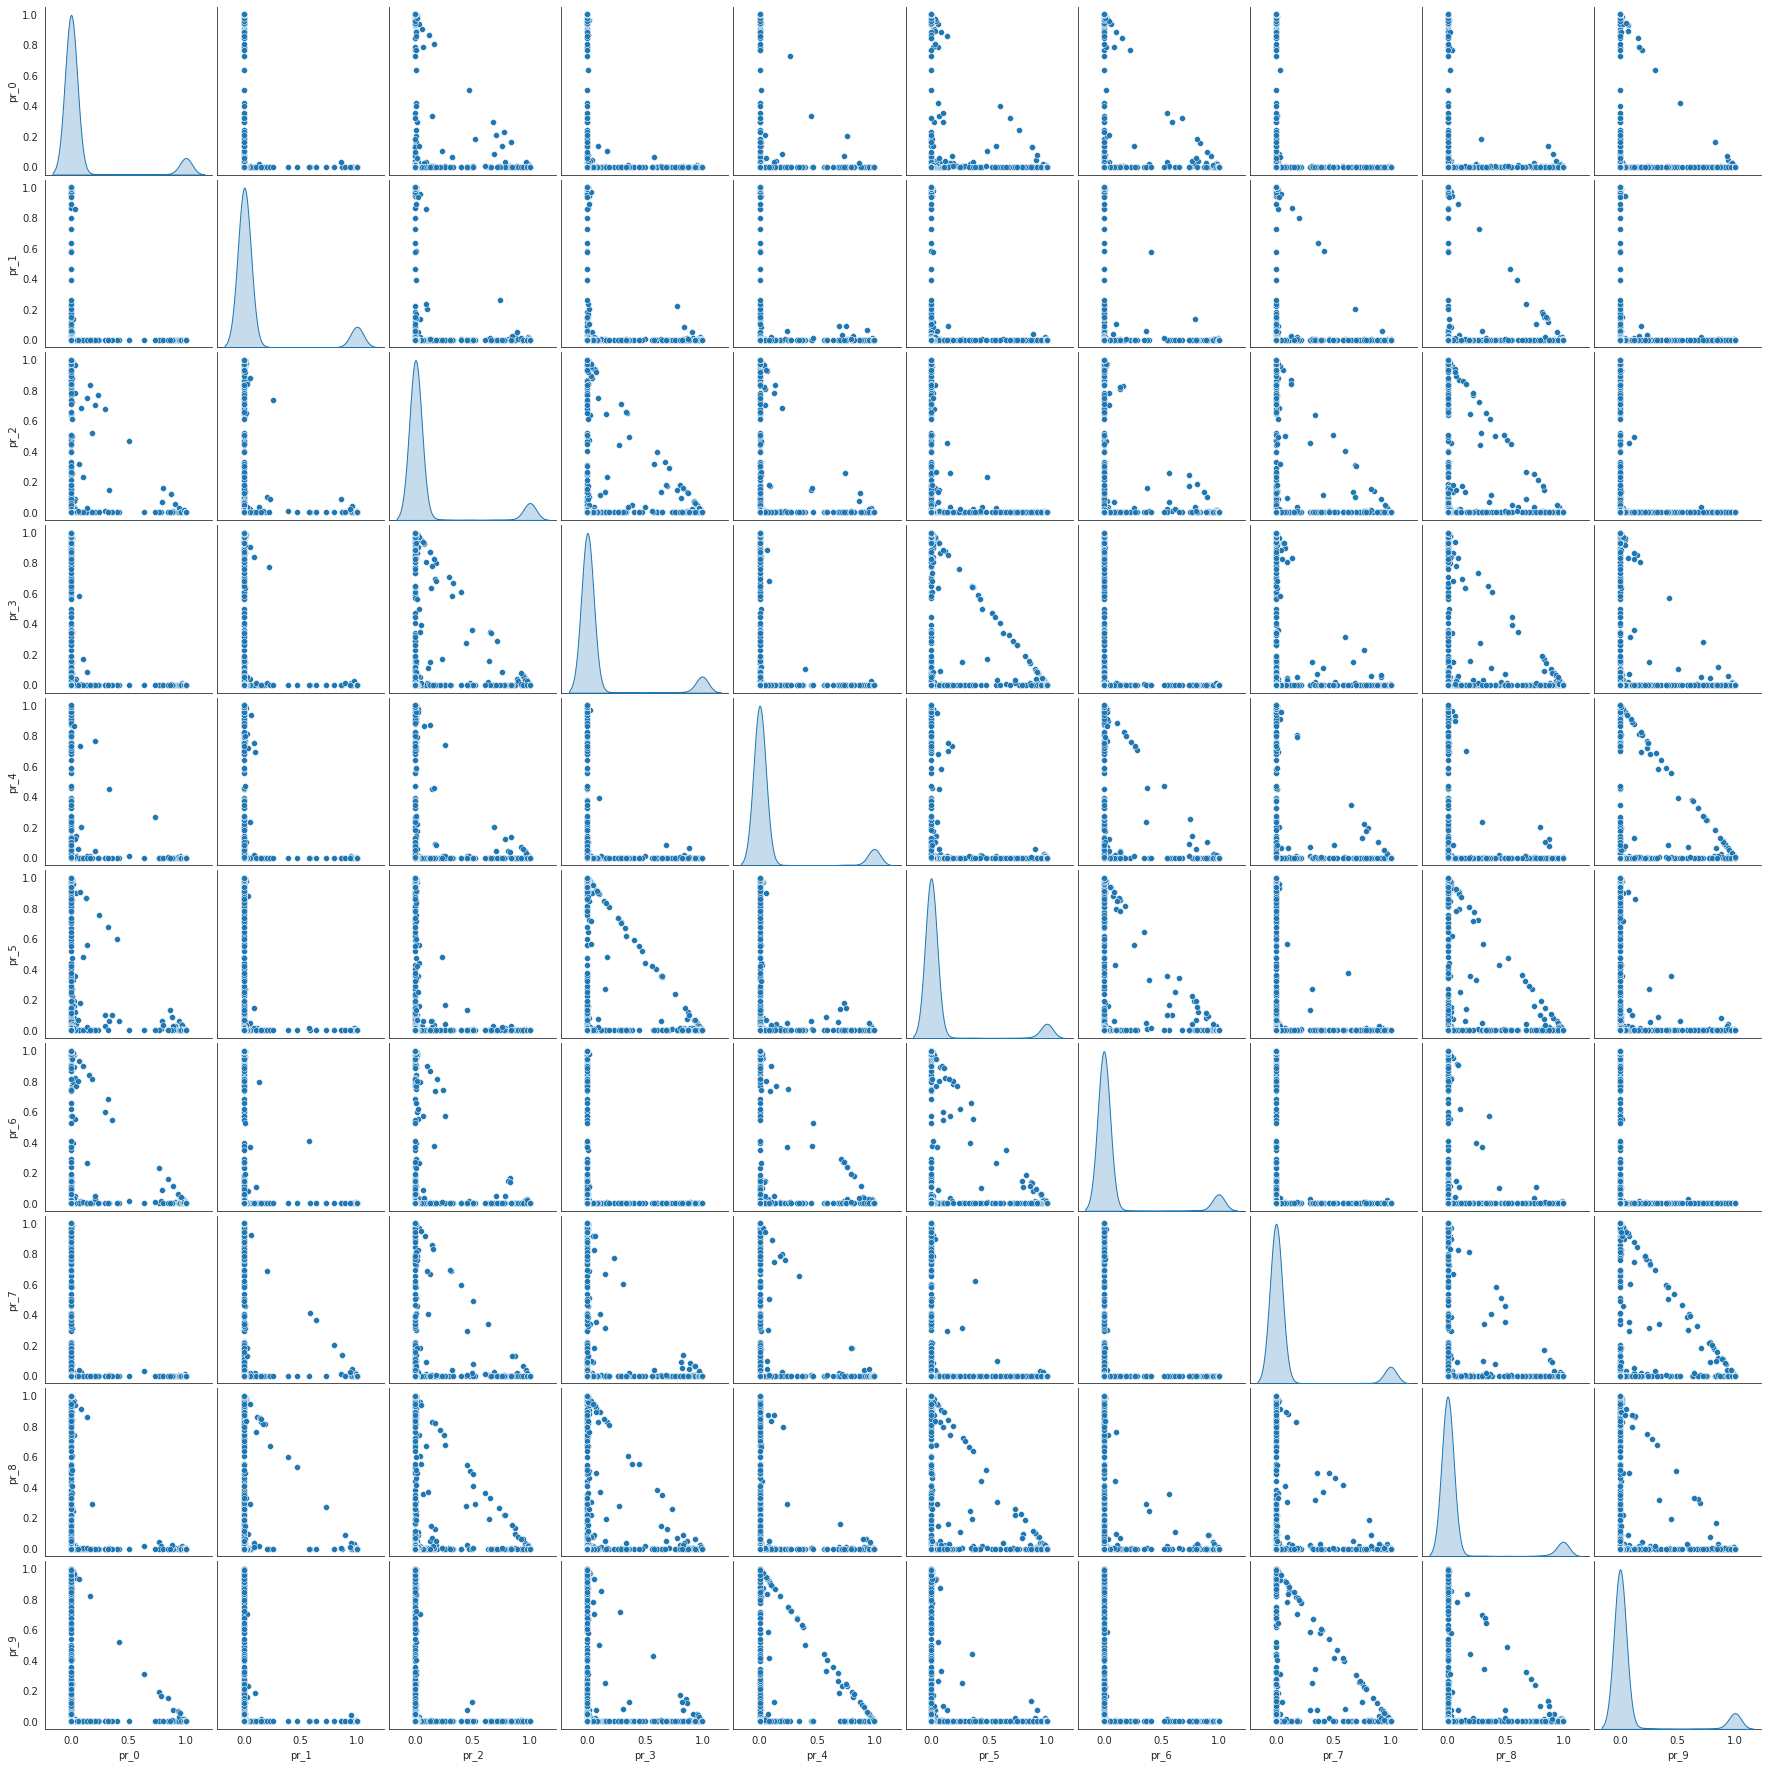

In [ ]:
labels = [f'pr_{i}' for i in range(10)]

df_proba_pred_only = pd.DataFrame(data=y_pred_proba, columns=labels)

pair_plot = sns.pairplot(
    df_proba_pred_only,
    diag_kind="kde",
    diag_kws=dict(fill=True))
plt.show()

### Conclusions on the probability pairplots

Discuss the pairplot structure here

The probability pair plot shows the distribution shape and correlation shape. The probability pair plot and the confusion matrix of the MLP classifier shows the  comparison of the correct digit with possible digits. For each MNIST image, it shows the probaility of the digit in the image getting predictied with the other possible choices. For example, looking at digit 0, it has really low possibilities that the digit will be classified as the digits 1, 3, and 7, while there is a probable cause that the digit 0 can be misclassified as the digits 2, 4, 5, 6, 8, and 9. Which is further supported by the confusion matrix plot above.  In addition, as shown by the confusion matrix, the digit 0 was mostly misclassified by as a 5, where in the probability pair plots has the most points along the diagonal. Looking at the pair plot of the digit 9, it is evident that they are most probable to be misclassified. Which can be backed up by the confusion matrix. 


### What went wrong?

Probably your classification results are not very impressive.

As a first step to interpret them, find 10 cases of wrongly classified numbers, plot them and discuss your findings.  

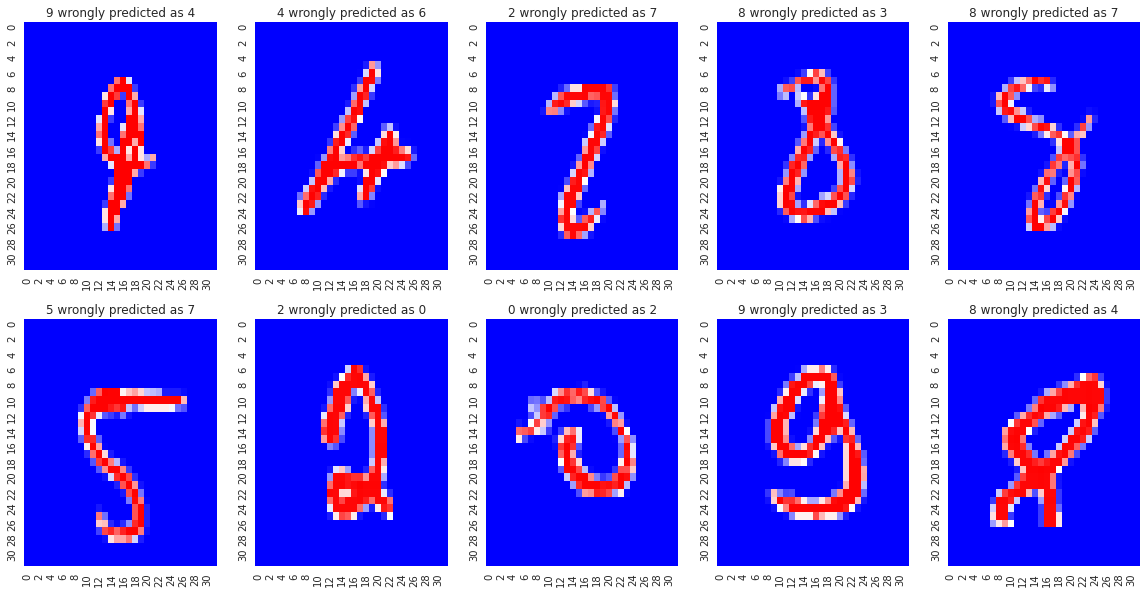

,Original Test Label,Predicted Label
0,9,4
1,4,6
2,2,7
3,8,3
4,8,7
5,5,7
6,2,0
7,0,2
8,9,3
9,8,4


In [ ]:
#find these examples and plot the images here

plt.figure(figsize=(20, 10))
wrong_classes = []
i = 0
while len(wrong_classes) < 10:
  if (y_test[i] != y_pred[i]).all():
    wrong_classes.append({
        'Original Test Label': y_test[i],
        'Predicted Label': y_pred[i],
    })
    plt.subplot(2, 5, len(wrong_classes))
    plt.title(f'{y_test[i]} wrongly predicted as {y_pred[i]}')
    sns.heatmap(X_test[i].reshape(32, 32), cmap='bwr', cbar=False)
  i += 1
plt.show()

df_error = pd.DataFrame(wrong_classes)
df_error.head(10)

It is evident that the handwriting style is important. The model has trouble classifying digits that is not written clearly or if the lines are not connected. This might be the case where the dataset lacks variability and the performance will benefit greatly by having more different styles of the written digits. 

## How to improve your results?

Recapitulate and discuss your results here and propose some ideas on how to improve them

For K-NN 10 fold GridSearchCV of [1,2,3,5,9,17,33] possible neighbours were used to get a result of 91.1% with four neighbours. 10 fold GridSearchCV of MLP with learning rate [1e-06, 1e-05, 0.0001, 0.001] and hidden layer size [(128, 128), (128,64), (64, 32)] returned 0.00001 and hidden layers of (128, 128) gave 94.4% but with higher computing time. The performance of K-NN is less since it is comparing with neighbours and there can be cases where the digits in the training dataset can have handwriting styles that looks like an another number. 

The results can be improved by allocating more data to the training set and using more exhaustive grid search parameters.  Another way the results can be improved is by using ensemble learnings such as bagging and stacking. Using a different classification methods such as CNN can also be considered. 